# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time
from datetime import datetime
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "Imperial"
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

#print(json.dumps(city_weather, indent=1))

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
print("-----------------------------")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
-----------------------------
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | vila franca do campo
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | mayumba
Processing Record 10 of Set 1 | talavera de la reina
Processing Record 11 of Set 1 | kisaran
Processing Record 12 of Set 1 | abu road
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | muswellbrook
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | chissamba
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | havelock
Processing Record 19 of Set 1 | labytnangi
Processing Record 20 of Set 1 | kap

City not found. Skipping...
Processing Record 33 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 34 of Set 4 | tuatapere
Processing Record 35 of Set 4 | laguna
Processing Record 36 of Set 4 | maykain
City not found. Skipping...
Processing Record 37 of Set 4 | sydney
Processing Record 38 of Set 4 | lianran
Processing Record 39 of Set 4 | santa isabel
Processing Record 40 of Set 4 | plettenberg bay
Processing Record 41 of Set 4 | labutta
City not found. Skipping...
Processing Record 42 of Set 4 | naze
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | ahipara
Processing Record 46 of Set 4 | thompson
Processing Record 47 of Set 4 | stony mountain
Processing Record 48 of Set 4 | upernavik
Processing Record 49 of Set 4 | ailigandi
Processing Record 0 of Set 5 | saulkrasti
Processing Record 1 of Set 5 | uzhur
Processing Record 2 of Set 5 | oda
Processing Record 3 of Set 5 | tanete
Processing Record 4 of Set 5

City not found. Skipping...
Processing Record 26 of Set 8 | iquique
Processing Record 27 of Set 8 | taltal
Processing Record 28 of Set 8 | kaduqli
Processing Record 29 of Set 8 | kandrian
Processing Record 30 of Set 8 | haines junction
Processing Record 31 of Set 8 | padrauna
Processing Record 32 of Set 8 | mezen
Processing Record 33 of Set 8 | meyungs
City not found. Skipping...
Processing Record 34 of Set 8 | nanortalik
Processing Record 35 of Set 8 | izhma
Processing Record 36 of Set 8 | puerto madryn
Processing Record 37 of Set 8 | kapustin yar
Processing Record 38 of Set 8 | laguna de perlas
Processing Record 39 of Set 8 | jiayuguan
Processing Record 40 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 41 of Set 8 | kluczbork
Processing Record 42 of Set 8 | sterling
Processing Record 43 of Set 8 | alofi
Processing Record 44 of Set 8 | lasa
Processing Record 45 of Set 8 | morant bay
Processing Record 46 of Set 8 | yaan
Processing Record 47 of Set 8 | astana
Proce

Processing Record 18 of Set 12 | kamenka
Processing Record 19 of Set 12 | freeport
Processing Record 20 of Set 12 | pimenta bueno
Processing Record 21 of Set 12 | coahuayana
Processing Record 22 of Set 12 | matara
Processing Record 23 of Set 12 | tabou
Processing Record 24 of Set 12 | carutapera
Processing Record 25 of Set 12 | atar
Processing Record 26 of Set 12 | shira
Processing Record 27 of Set 12 | bikin
Processing Record 28 of Set 12 | beckley
Processing Record 29 of Set 12 | nivala
Processing Record 30 of Set 12 | mitsamiouli
Processing Record 31 of Set 12 | sao joao da barra
Processing Record 32 of Set 12 | komsomolskiy
Processing Record 33 of Set 12 | sao miguel do araguaia
Processing Record 34 of Set 12 | nizhneangarsk
Processing Record 35 of Set 12 | portland
Processing Record 36 of Set 12 | charlestown
Processing Record 37 of Set 12 | virginia beach
Processing Record 38 of Set 12 | praia da vitoria
Processing Record 39 of Set 12 | san policarpo
Processing Record 40 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,74.84,78,3,14.45,PF,1687800911
1,punta arenas,-53.1500,-70.9167,37.51,75,100,18.41,CL,1687801174
2,vila velha,-20.3297,-40.2925,78.75,87,75,8.05,BR,1687801130
3,new norfolk,-42.7826,147.0587,49.50,75,100,6.93,AU,1687801174
4,mar del plata,-38.0023,-57.5575,60.82,72,0,10.36,AR,1687801174


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,74.84,78,3,14.45,PF,1687800911
1,punta arenas,-53.1500,-70.9167,37.51,75,100,18.41,CL,1687801174
2,vila velha,-20.3297,-40.2925,78.75,87,75,8.05,BR,1687801130
3,new norfolk,-42.7826,147.0587,49.50,75,100,6.93,AU,1687801174
4,mar del plata,-38.0023,-57.5575,60.82,72,0,10.36,AR,1687801174


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

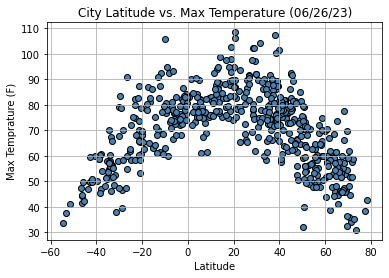

<Figure size 432x288 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

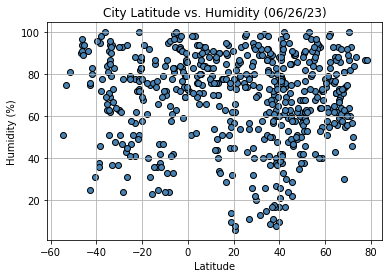

<Figure size 432x288 with 0 Axes>

In [9]:
# Bux_values = lat
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

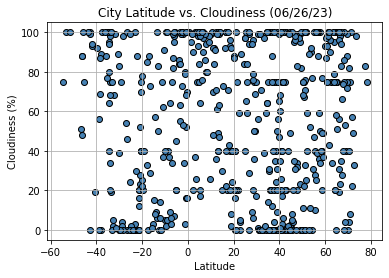

<Figure size 432x288 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.show()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

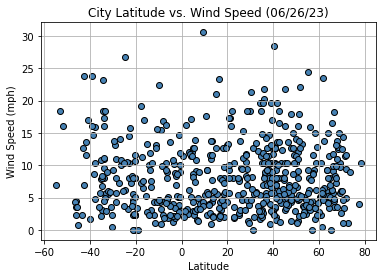

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/lat_vs_wind.png")
plt.show()

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    xmin = x_values.min()
    ymin = y_values.min()
    plt.annotate(line_eq, (xmin,ymin), fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,vila franca do campo,37.7167,-25.4333,73.81,70,4,7.92,PT,1687801175
7,severo-kurilsk,50.6789,156.1250,50.68,72,100,9.04,RU,1687801175
9,talavera de la reina,39.9635,-4.8308,101.35,10,0,11.72,ES,1687801175
10,kisaran,2.9845,99.6158,73.11,98,37,2.51,ID,1687801176
11,abu road,24.4833,72.7833,82.83,76,84,5.41,IN,1687801176


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,74.84,78,3,14.45,PF,1687800911
1,punta arenas,-53.1500,-70.9167,37.51,75,100,18.41,CL,1687801174
2,vila velha,-20.3297,-40.2925,78.75,87,75,8.05,BR,1687801130
3,new norfolk,-42.7826,147.0587,49.50,75,100,6.93,AU,1687801174
4,mar del plata,-38.0023,-57.5575,60.82,72,0,10.36,AR,1687801174


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.47475024819781847
The correlation between both factors is -0.69


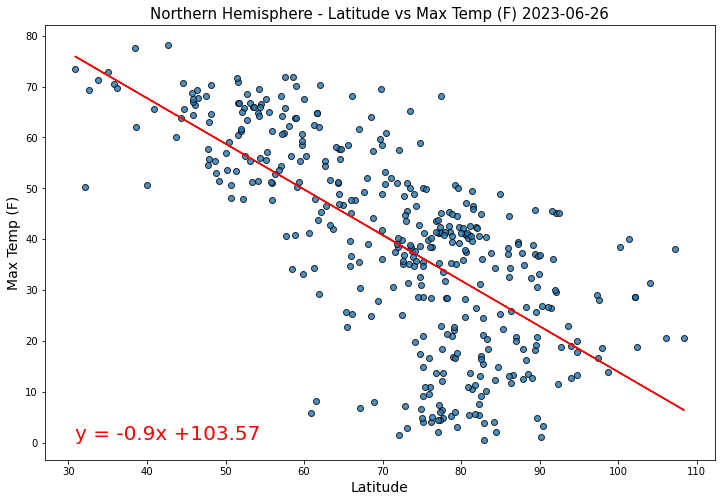

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df["Lat"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Save the figure
plt.savefig("output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.5825903653168177
The correlation between both factors is 0.76


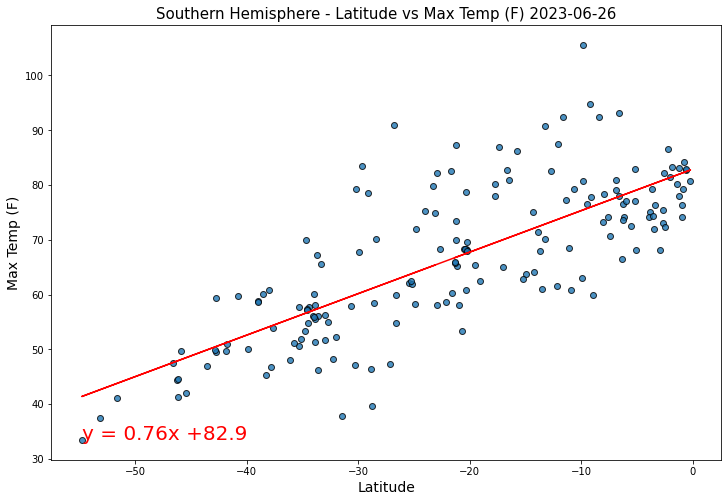

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

# Save the figure
plt.savefig("output_data/southern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** 
A negative correlation is observed between latitude and temperature for the northern hemisphere. As latitude increases the max temperature decreases.

A positve correlation is observed between latitude and temperature for the southern hemisphere. As latitiude increases the max temeperature does as well.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 8.017037228426182e-05
The correlation between both factors is -0.01


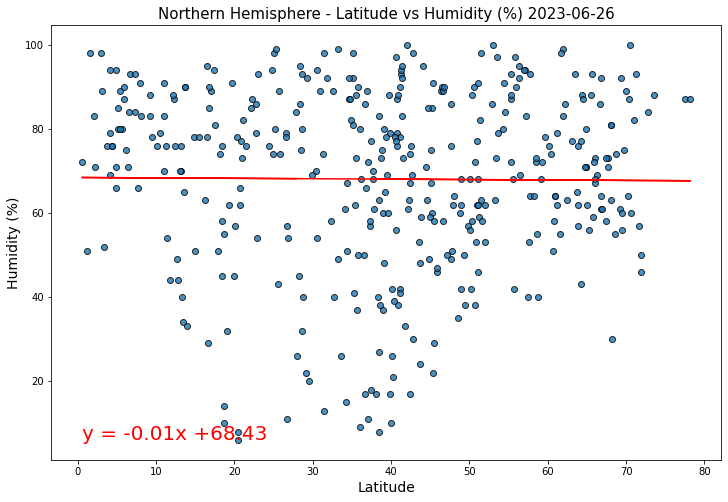

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("output_data/northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

The r-squared is: 3.5836383648202176e-05
The correlation between both factors is 0.01


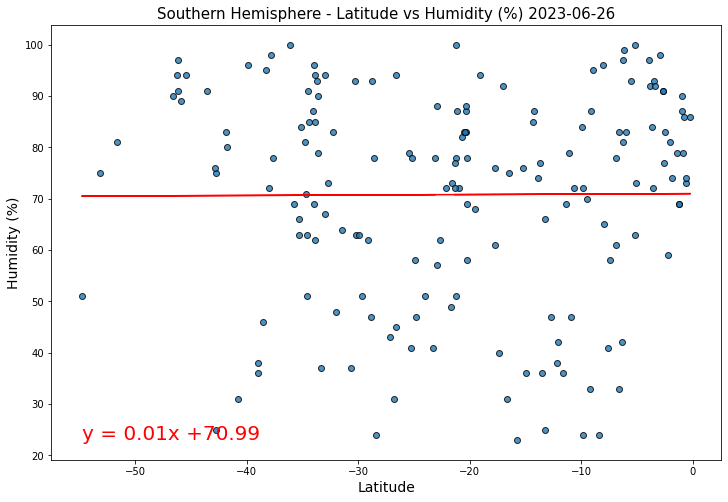

In [18]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("output_data/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** 
No corellarion between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.003850032886175152
The correlation between both factors is -0.06


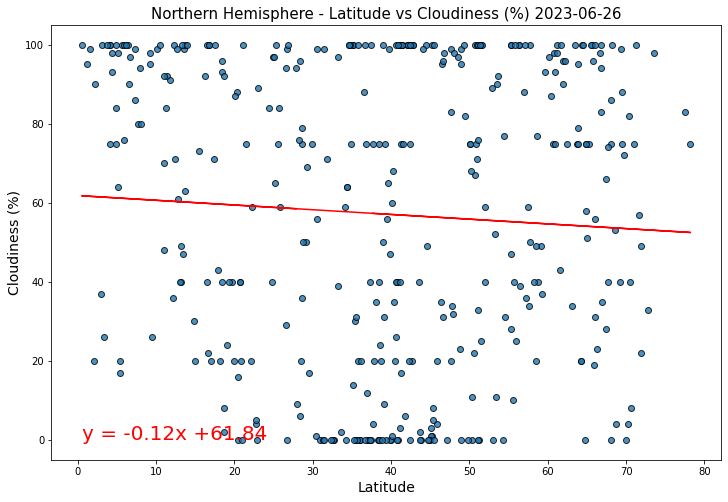

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("output_data/northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.01014767435313425
The correlation between both factors is -0.1


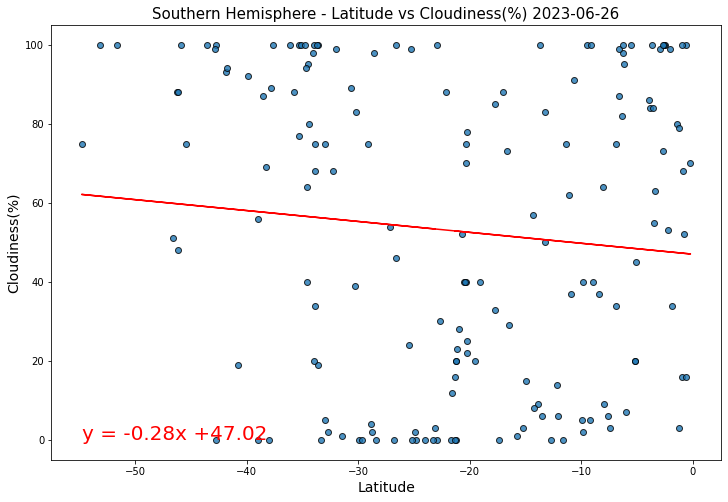

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("output_data/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00028656558428100066
The correlation between both factors is -0.02


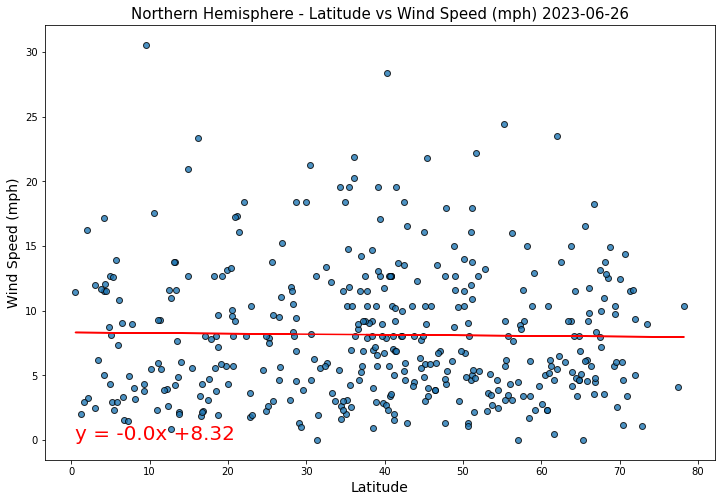

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("output_data/northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.03930047144522406
The correlation between both factors is -0.2


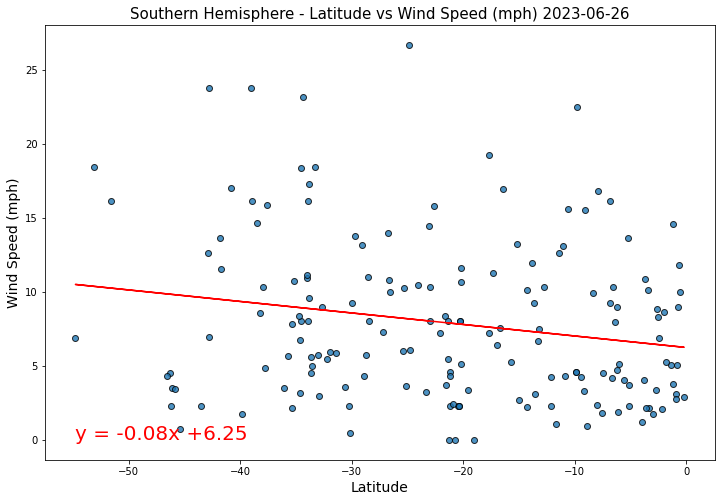

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** 
Very minor negative corelation seen between these traits